In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [161]:
# data source - https://www.cryptodatadownload.com/
BTC = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv')

In [95]:
#Changing the foramt of timestamp to datetime format
BTC['Timestamp'] = BTC['Timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [96]:
BTC.set_index('Timestamp', inplace=True)
BTC.index = pd.to_datetime(BTC.index)
BTC_final = BTC['2017-01-01': '2018-11-10' ].copy()

In [97]:
BTC_final.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-11-10 23:55:00,6348.54,6348.54,6348.54,6348.54,0.007997,50.769274,6348.540000
2018-11-10 23:56:00,6348.54,6349.01,6348.54,6349.01,0.011729,74.466671,6348.936090
2018-11-10 23:57:00,6349.01,6349.01,6349.01,6349.01,0.068436,434.503642,6349.010000
2018-11-10 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-10 23:59:00,6349.17,6349.32,6349.17,6349.32,0.038261,242.927410,6349.214148


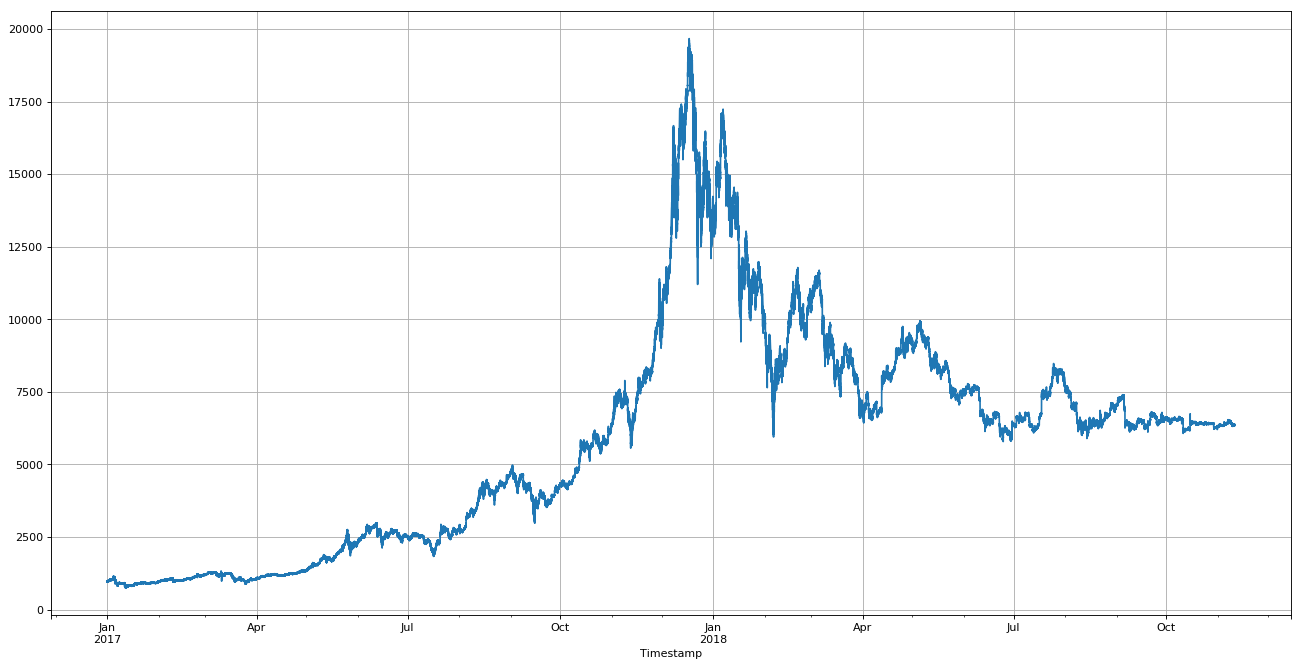

In [98]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
BTC_final['Close'].plot(kind='line', grid=True)


In [4]:
SP_temp = pd.read_csv('^GSPC.csv')
SP_temp.set_index('Date', inplace=True)
SP_temp.index = pd.to_datetime(SP_temp.index)
SP500 = SP_temp['2017-01-01': '2018-11-10' ].copy()

In [6]:
SP500.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

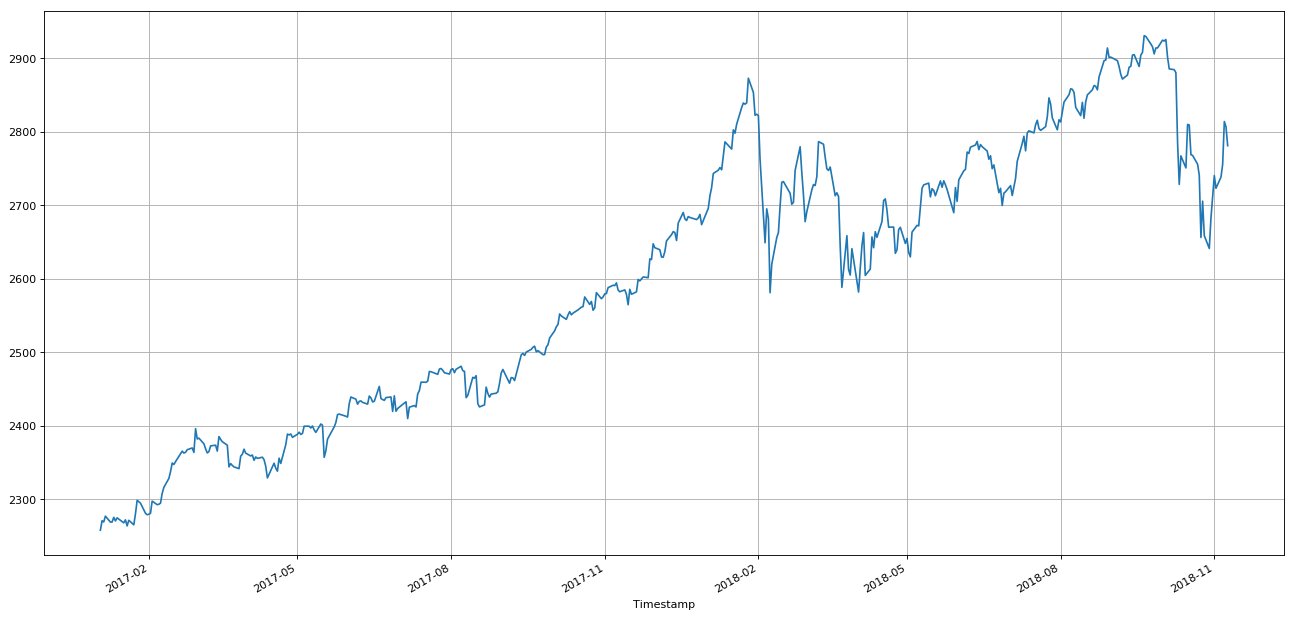

In [202]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt2 = SP500['Adj Close'].plot(kind='line', grid=True)
fig1 = plt2.get_figure()
fig1.savefig('SP500.png', dpi=100)

In [ ]:
# calcuating 2

In [99]:
BTC_final['pct_change'] = BTC_final['Close'].pct_change()

In [88]:
SP500['pct_change'] = SP500['Adj Close'].pct_change()

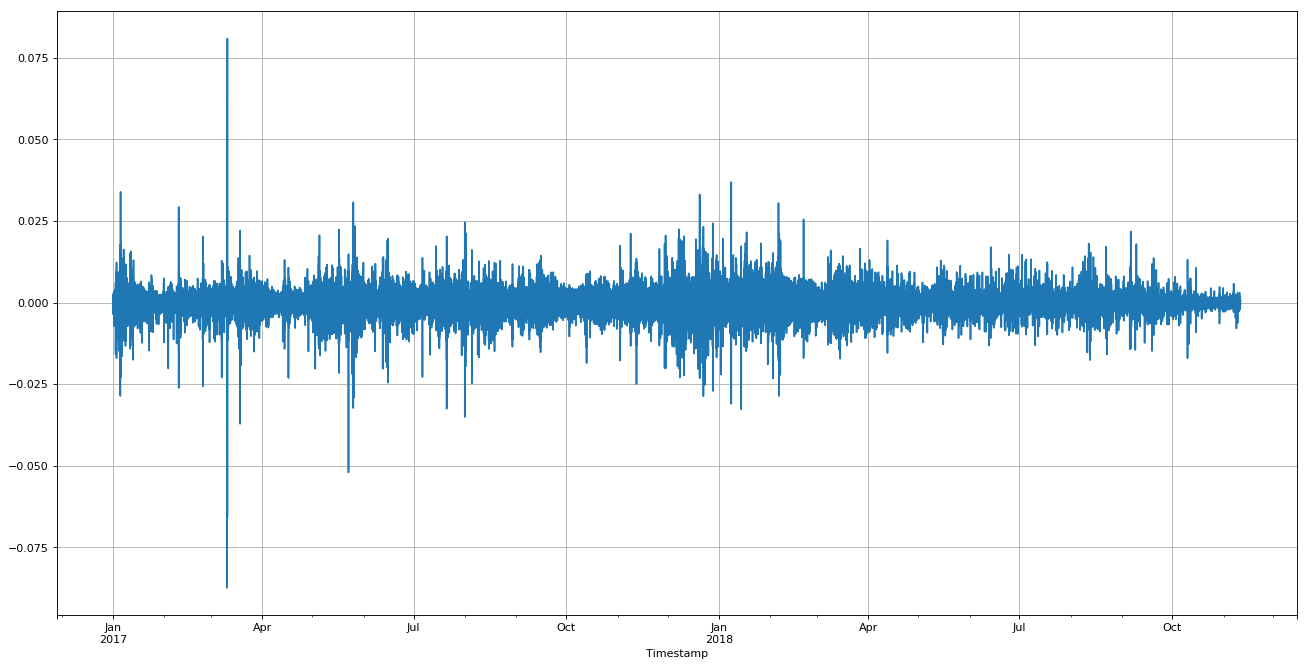

In [101]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
BTC_final['pct_change'].plot( grid=True)

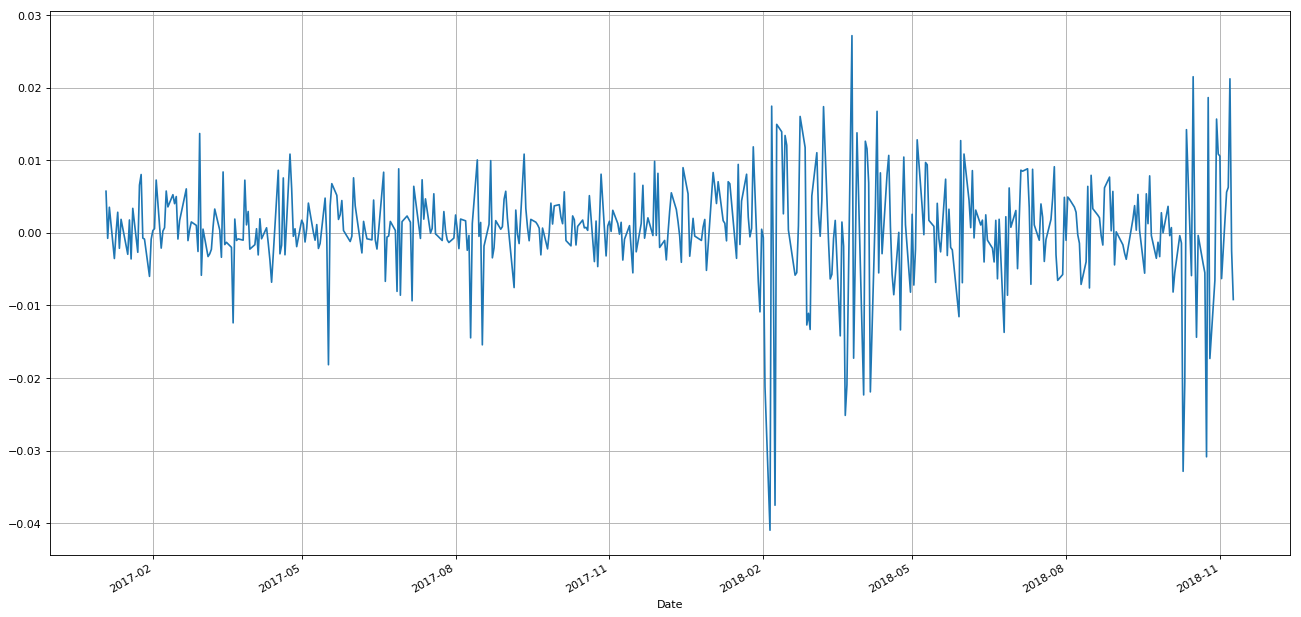

In [102]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
SP500['pct_change'].plot( grid=True)

In [103]:
BTC_final['pct_change'].corr(SP500['pct_change'])

-0.0005690539131569678

In [105]:
BTC_final['Close'].corr(SP500['Adj Close'])

0.7146155263087706

In [114]:
BTC_final['price_moving_avg'] = BTC_final['Close'].rolling(window=50).mean()

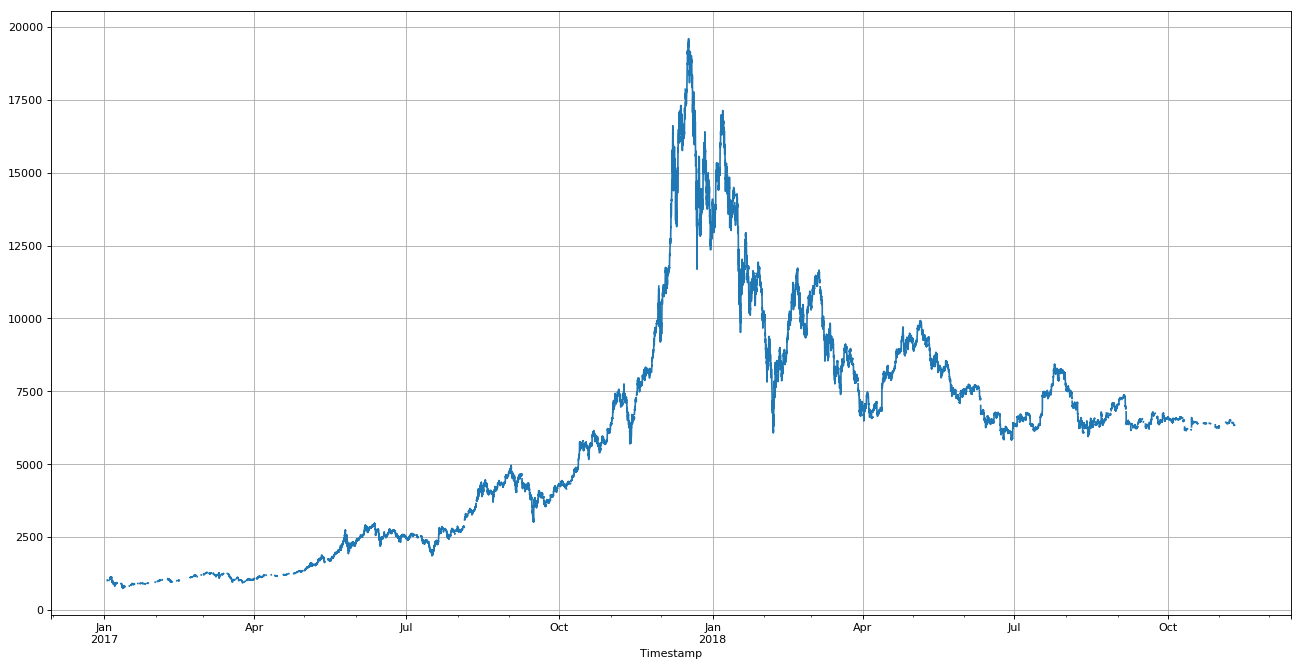

In [115]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
BTC_final['price_moving_avg'].plot(kind='line', grid=True)

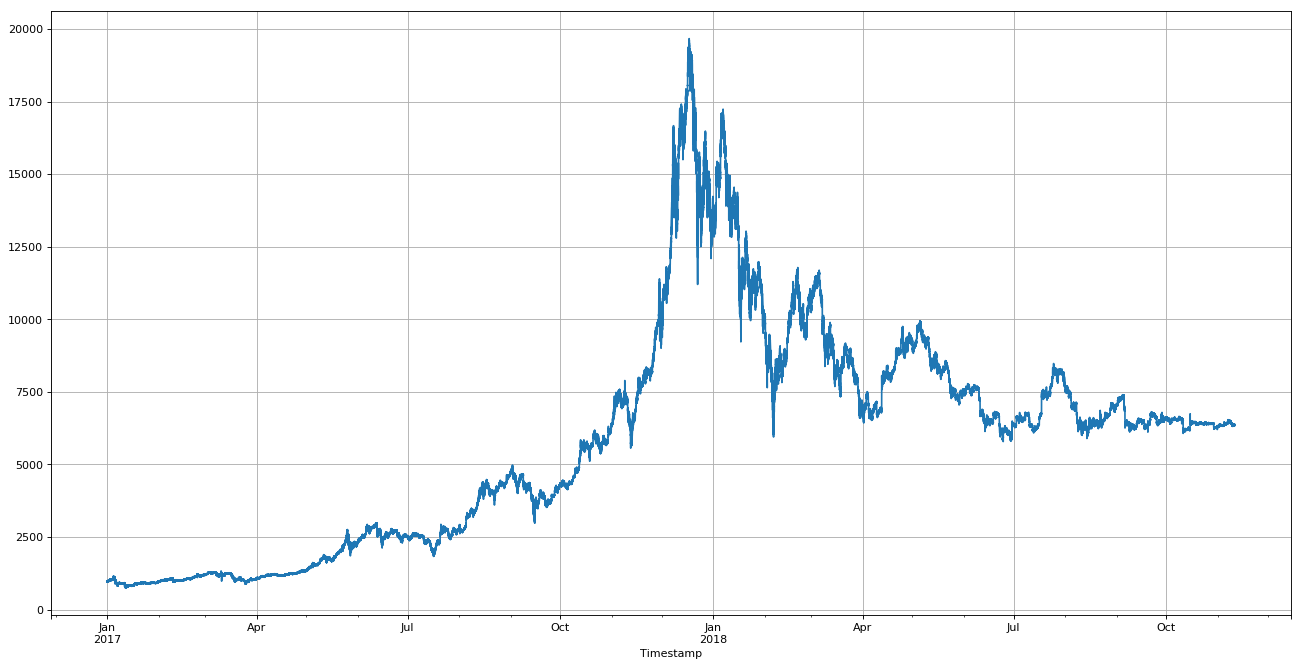

In [111]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
BTC_final['Close'].plot(kind='line', grid=True)

In [116]:
len(BTC_final)

977760

In [119]:
BTC_nan = BTC_final.dropna()

In [120]:
len(BTC_nan)

515596

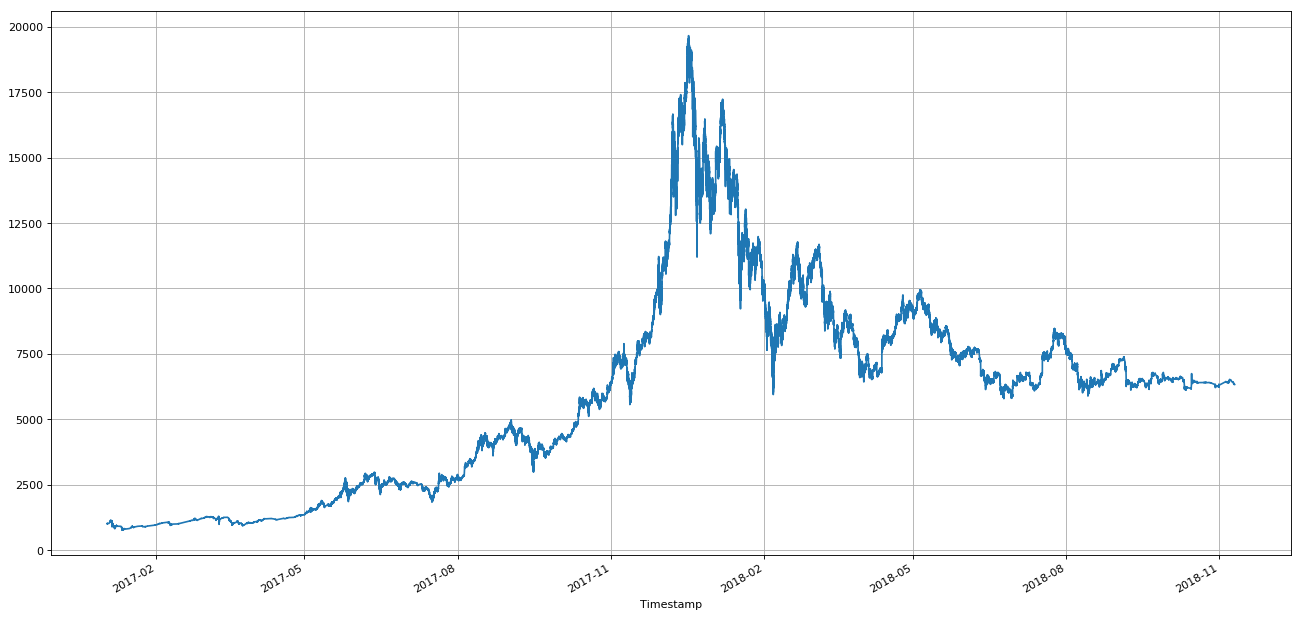

In [121]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
BTC_nan['Close'].plot(kind='line', grid=True)

In [130]:
BTC_nan['price_moving_avg1'] = BTC_nan['Close'].rolling(window=1440).mean()

/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


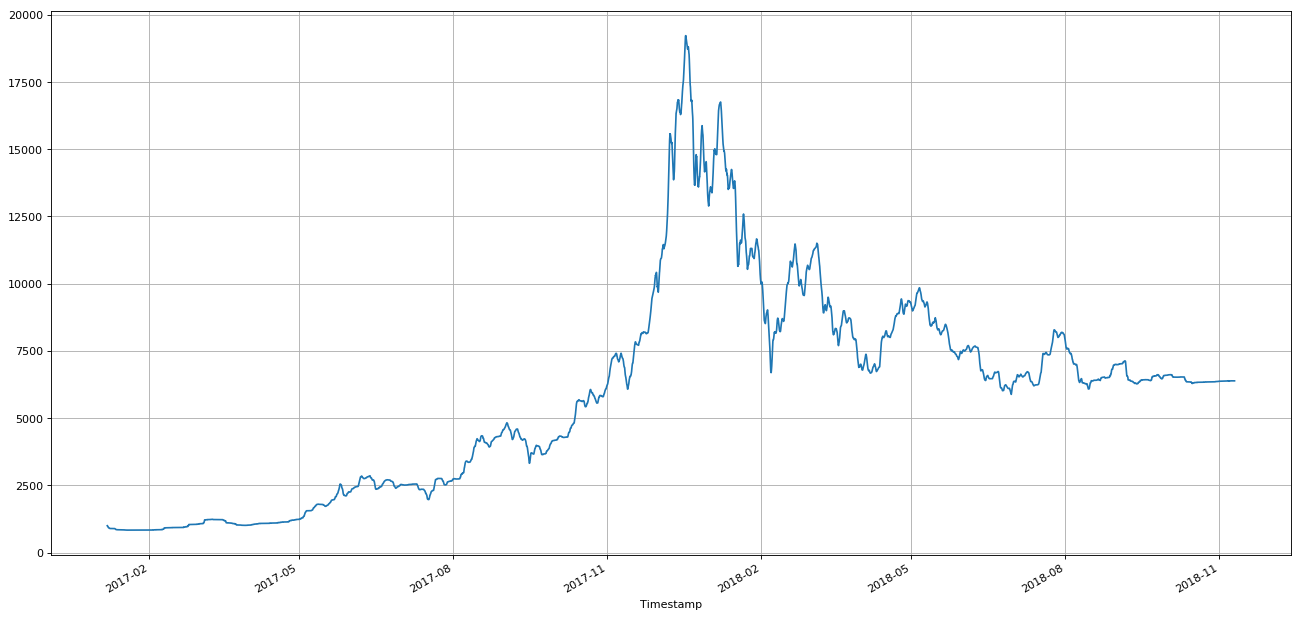

In [200]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt1 = BTC_nan['price_moving_avg1'].plot(kind='line', grid=True)
fig = plt1.get_figure()
fig.savefig("btc.png", dpi=100)

In [136]:
SP500['price_moving_avg'] = SP500['Adj Close'].rolling(window=5).mean()

In [133]:
BTC_nan['price_moving_avg1'].corr(SP500['Adj Close'])

0.5256440333092303

In [148]:
BTC_nan['price_moving_avg1'].corr(SP500['price_moving_avg'])

0.5112088019648954

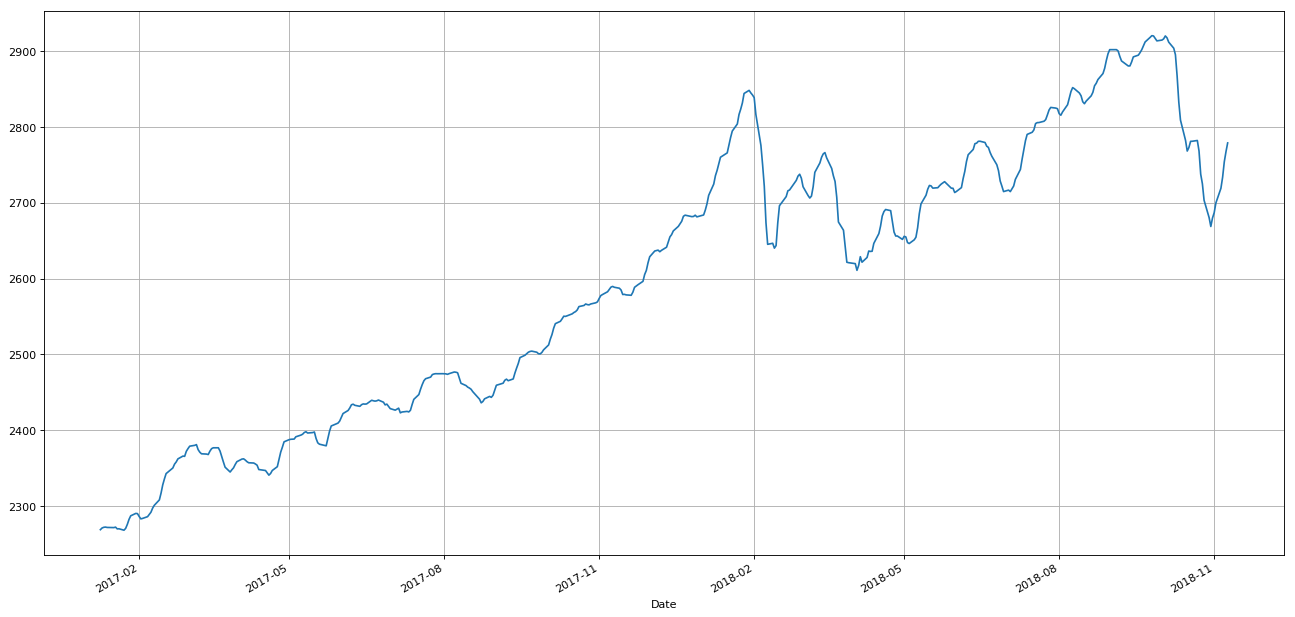

In [137]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt2 = SP500['price_moving_avg'].plot(kind='line', grid=True)
fig1 = plt2.get_figure()
fig1.savefig("SP.png", dpi=100)

In [145]:
BTC_nan['moving_pct_change'] = BTC_nan['Close'].pct_change().rolling(window=1440).mean()

/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


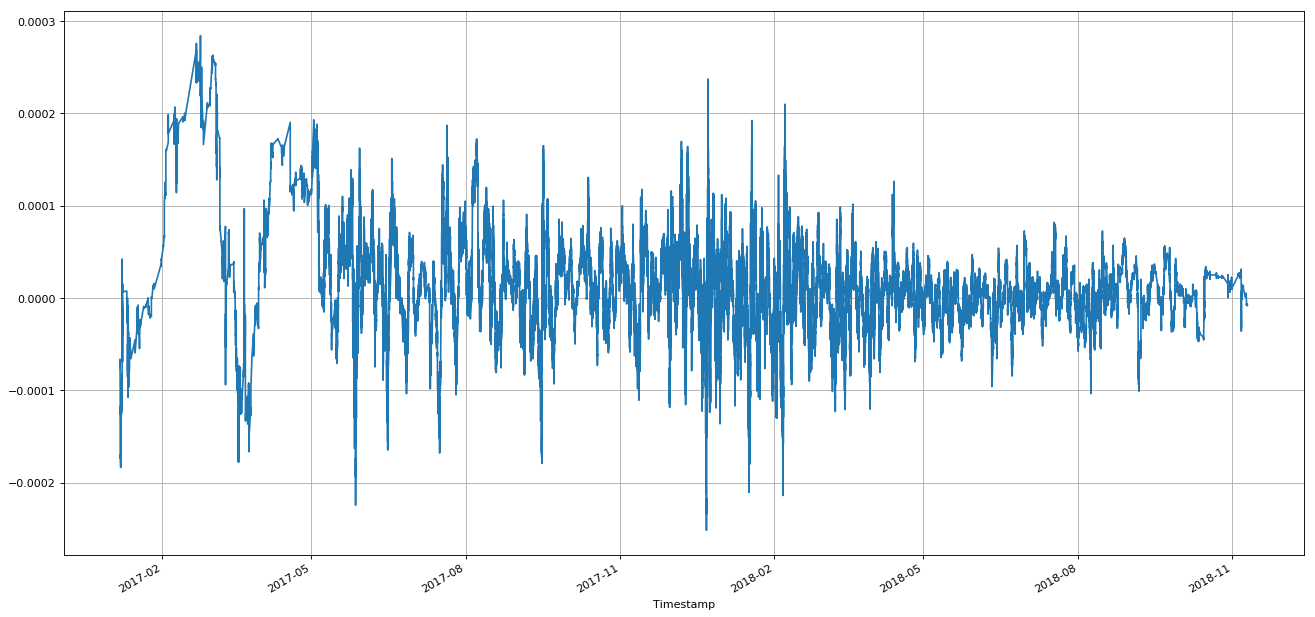

In [146]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
BTC_nan['moving_pct_change'].plot(kind='line', grid=True)

In [143]:
SP500['moving_pct_change'] = SP500['Adj Close'].pct_change().rolling(window=5).mean()

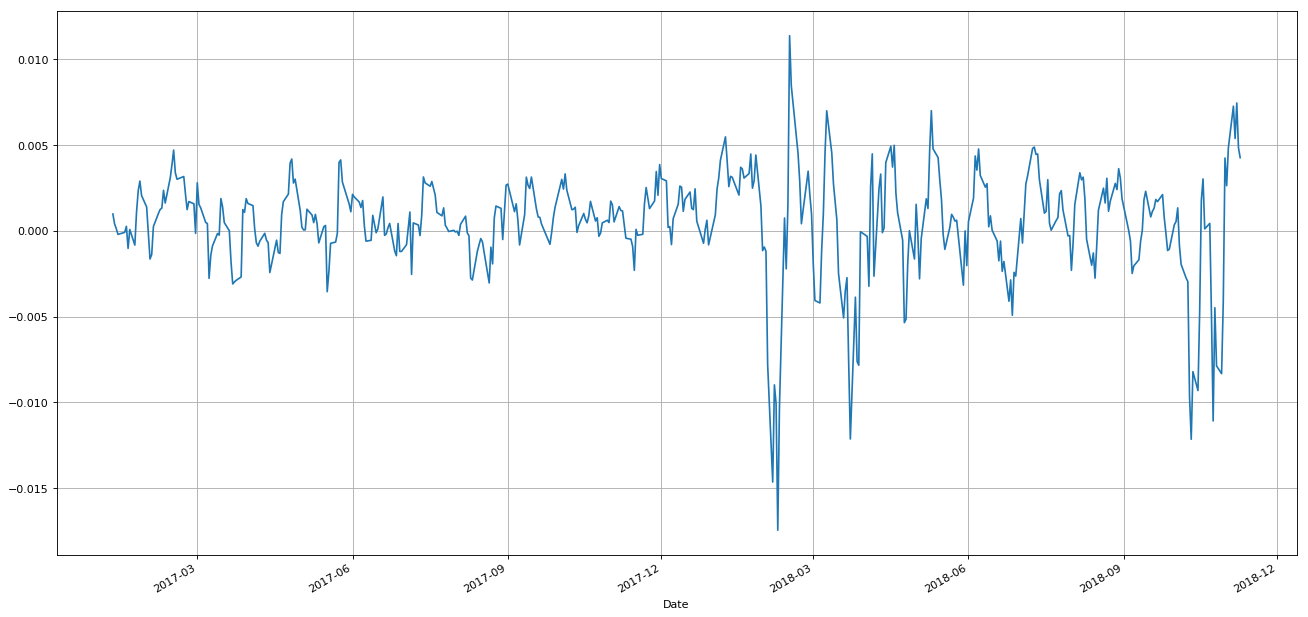

In [144]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
SP500['moving_pct_change'].plot(kind='line', grid=True)

In [147]:
SP500['moving_pct_change'].corr(BTC_nan['moving_pct_change'])

0.08296400690747148

# OLS on moving average of percent change


In [156]:
import statsmodels.api as sm

In [ ]:
BTC = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv')

In [166]:
BTC['Timestamp'] = BTC['Timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
BTC.set_index('Timestamp', inplace=True)
BTC.index = pd.to_datetime(BTC.index)
BTC_final = BTC['2017-01-01': '2018-11-10' ].copy()

In [169]:
SP_temp = pd.read_csv('^GSPC.csv')
SP_temp.set_index('Date', inplace=True)
SP_temp.index.names = ['Timestamp']
SP_temp.index = pd.to_datetime(SP_temp.index)
SP500 = SP_temp['2017-01-01': '2018-11-10' ].copy()

In [175]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 469 entries, 2017-01-03 to 2018-11-09
Data columns (total 6 columns):
Open         469 non-null float64
High         469 non-null float64
Low          469 non-null float64
Close        469 non-null float64
Adj Close    469 non-null float64
Volume       469 non-null int64
dtypes: float64(5), int64(1)
memory usage: 25.6 KB


In [176]:
df=SP500.merge(BTC_final, how='inner', on=['Timestamp'])

In [233]:
df['SP_moving_avg'] = df['Adj Close'].pct_change().rolling(window = 2).mean()

In [235]:
df['BTC_moving_avg'] = df['Weighted_Price'].pct_change().rolling(window=2).mean()

In [237]:
df.head()

,Open_x,High_x,Low_x,Close_x,Adj Close,Volume,Open_y,High_y,Low_y,Close_y,Volume_(BTC),Volume_(Currency),Weighted_Price,SP_moving_avg,BTC_moving_avg
Timestamp,,,,,,,,,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000,1011.44,1012.02,1011.43,1012.02,1.272808,1287.897103,1011.855147,NaN,NaN
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000,1035.51,1035.74,1035.51,1035.74,1.098924,1138.174099,1035.716977,NaN,NaN
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000,1114.38,1114.92,1113.94,1113.97,17.933215,19983.147340,1114.309221,0.002476,0.049732
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000,1004.73,1004.74,1004.73,1004.74,6.542257,6573.255809,1004.738175,0.001373,-0.011224
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000,909.80,909.80,909.80,909.80,0.027223,24.767331,909.800000,-0.000016,-0.096411


In [238]:
df_temp = df.dropna()

In [239]:
df_temp.head()

,Open_x,High_x,Low_x,Close_x,Adj Close,Volume,Open_y,High_y,Low_y,Close_y,Volume_(BTC),Volume_(Currency),Weighted_Price,SP_moving_avg,BTC_moving_avg
Timestamp,,,,,,,,,,,,,,,
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000,1114.38,1114.92,1113.94,1113.97,17.933215,19983.147340,1114.309221,0.002476,0.049732
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000,1004.73,1004.74,1004.73,1004.74,6.542257,6573.255809,1004.738175,0.001373,-0.011224
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000,909.80,909.80,909.80,909.80,0.027223,24.767331,909.800000,-0.000016,-0.096411
2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,2268.899902,3638790000,896.09,896.09,896.06,896.06,0.053457,47.901604,896.083827,-0.001774,-0.054783
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,2275.320068,3620410000,905.24,905.24,904.08,904.08,0.111000,100.379560,904.320360,0.001415,-0.002942


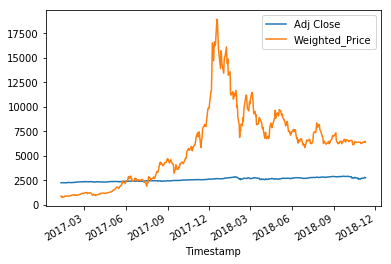

In [210]:
df_temp.plot( y = ['Adj Close', 'Weighted_Price'])

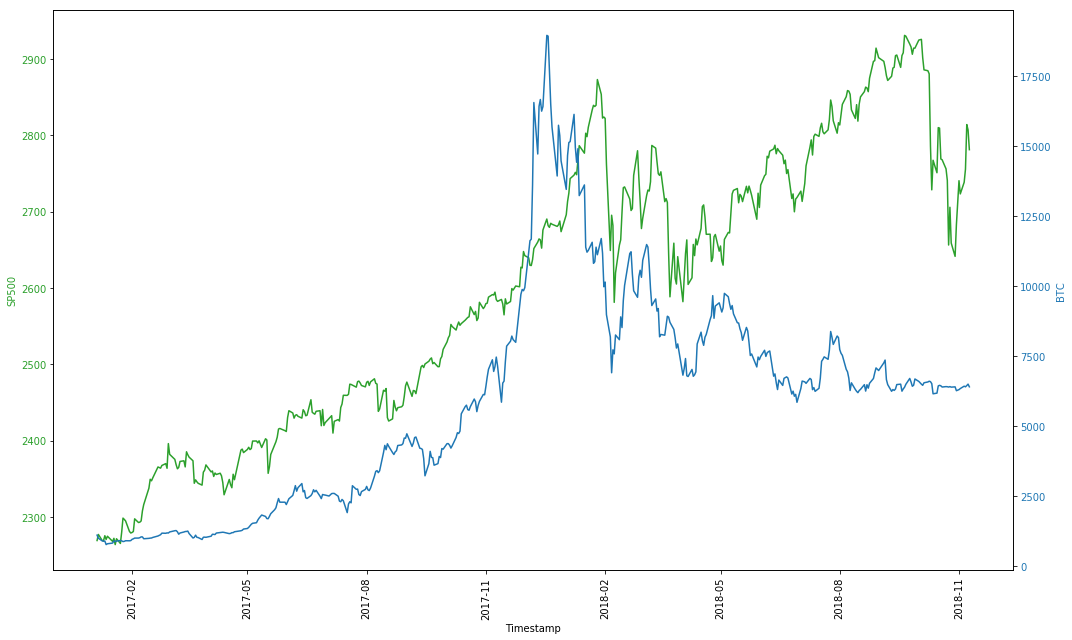

<Figure size 1600x800 with 0 Axes>

In [240]:
fig, ax1 = plt.subplots(figsize=(15,9))

color1 = 'tab:green'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('SP500', color=color1)
ax1.plot(df_temp['Adj Close'], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('BTC', color=color)  # we already handled the x-label with ax1
ax2.plot(df_temp['Weighted_Price'])
ax2.tick_params(axis='y', labelcolor=color)


figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('df.png', dsi=100)

In [241]:
X = df_temp[['SP_moving_avg']]
X = sm.add_constant(X)
y = df_temp['BTC_moving_avg']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         BTC_moving_avg   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     8.861
Date:                Tue, 04 Dec 2018   Prob (F-statistic):            0.00307
Time:                        22:27:40   Log-Likelihood:                 835.88
No. Observations:                 457   AIC:                            -1668.
Df Residuals:                     455   BIC:                            -1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0050      0.002      2.748

# Looking at the adjusted R-squared value, we can say that S&P 500 is not able to explain a lot of variance of the bitcoin movement